In [1]:
import nltk
%matplotlib inline
nltk.download("punkt")
nltk.download("cmudict")

import sys
import streamlit as st
import os
import pandas as pd
import pickle
import numpy as np
import plotly.figure_factory as ff
import plotly.express as px
import copy
import streamlit as st
import math
import scipy
import plotly.graph_objects as go
import shelve
import plotly.express as px
import pandas as pd
from random import sample
from scipy.stats import pearsonr
from science_access.t_analysis import not_want_list
import seaborn as sns

not_want_list.extend(
    ["link", "librarian", "issue", "abstract", "science", "cookie", "publication"]
)

from science_access.online_app_backend import call_from_front_end
from science_access.online_app_backend import ar_manipulation
from science_access.t_analysis import text_proc
from science_access.online_app_backend import semantic_scholar_alias



from science_access.enter_author_name import (
    art_cloud,
    create_giant_strings,
    art_cloud_wl,
    zipf_plot,
)
from science_access.enter_author_name import (
    distribution_plot_from_scrape,
    grand_distribution_plot,
    data_frames_from_scrape,
)
from science_access.enter_author_name import (
    push_frame_to_screen,
    fast_art_cloud,
    grab_data_for_splash,
)
from science_access.enter_author_name import (
    frame_to_lists,
    try_and_update_cache,
    extra_options,
)
import matplotlib.pyplot as plt



[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /home/user/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!
/home/user/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning:

The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.



In [2]:
author_name="Brian H Smith"
def do_science(author_name):
    ar = call_from_front_end(author_name, tns=10, fast=True)
    author = pd.DataFrame(ar)
    #fig = plt.figure()
    #plt.scatter(list(range(0,len(author["numCitedBy"]))),author["numCitedBy"],label="citedby")
    #plt.scatter(list(range(0,len(author["numCitedBy"]))),author["standard"],label="readability")
    #plt.legend()
    #plt.show()
    corr, _ = pearsonr(author["numCitedBy"], author["standard"])
    #print('Pearsons correlation: %.3f' % corr)
    #fig = plt.figure()    
    #plt.scatter(author["standard"],author["numCitedBy"])
    #plt.ylabel("numCitedBy")
    #plt.xlabel("readability")
    #plt.show()

    return (author["numCitedBy"],author["standard"],author)


In [3]:
listed=[]
multi_author_frame = pd.DataFrame()

In [4]:
author_name="Patrick McGurrin"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])
listed.append((author_numCitedBy,author_standard))

2021-06-11 12:53:45.181 WARNING root: 
  command:

    streamlit run /home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [5]:
author_name="Brian H Smith"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])

listed.append((author_numCitedBy,author_standard))
author_name="Brian Usher"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])

listed.append((author_numCitedBy,author_standard))
author_name="Bradley Lusk"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])

listed.append((author_numCitedBy,author_standard))

In [6]:
author_name="Thomas Close"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])

listed.append((author_numCitedBy,author_standard))

In [7]:
author_name="Rebecca Featherston"
(author_numCitedBy,author_standard,df) = do_science(author_name)
listed.append((author_numCitedBy,author_standard))
multi_author_frame = pd.concat([multi_author_frame,df])


In [8]:
author_name="Paul Nicholas"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])

listed.append((author_numCitedBy,author_standard))

In [9]:
author_name="David Grayden"
(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])

listed.append((author_numCitedBy,author_standard))


In [10]:
author_name="Sayali Phatak"

(author_numCitedBy,author_standard,df) = do_science(author_name)
multi_author_frame = pd.concat([multi_author_frame,df])


In [11]:
multi_author_frame

,citationVelocity,fieldsOfStudy,numCitedBy,semantic,link,science,big_words,standard,fre_unbiased,standard_unbiased,hard_snippet,wcount,tokens,uniqueness,unique_words,sp,ss,sp_norm,ss_norm,gf
0,0,['Medicine'],0,True,In vivo assessment of neurodegeneration in Spi...,True,[],30.0,88.740000,23.0,,43,"[highlights, dti, study, reveals, brain, wide,...",0.906977,39,0.100000,0.400000,0.100000,0.400000,24.76
1,0,['Medicine'],0,True,In vivo assessment of neurodegeneration in Spi...,True,[],30.0,88.740000,23.0,,43,"[highlights, dti, study, reveals, brain, wide,...",0.906977,39,0.100000,0.400000,0.100000,0.400000,24.76
2,0,['Medicine'],0,True,Thalamic Tremor Following Focused Ultrasound T...,True,[],189.0,80.535417,15.0,,479,"[magnetic, resonance, guided, focused, ultraso...",0.463466,222,0.053717,0.317509,0.053717,0.317509,199.14
3,0,['Medicine'],1,True,Electrophysiological Evidence for Functional (...,True,[],47.0,36.636667,47.0,,102,"[background, there, is, little, published, wor...",0.696078,71,0.101562,0.328125,0.101562,0.328125,47.47
4,0,['Medicine'],1,True,Electrophysiological Evidence for Functional (...,True,[],47.0,36.636667,47.0,,102,"[background, there, is, little, published, wor...",0.696078,71,0.101562,0.328125,0.101562,0.328125,47.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0,['Medicine'],7,True,Detecting Insulin Sensitivity Changes for Indi...,True,[],73.0,87.809583,0.0,background: a method to calculate changes in i...,169,"[background, a, method, to, calculate, changes...",0.644970,109,-0.000833,0.505833,0.000833,0.505833,78.35
6,5,"['Computer Science', 'Psychology', 'Medicine']",16,True,Modeling individual differences: A case study ...,True,[],145.0,51.438750,0.0,background\ncontrol systems engineering method...,358,"[background, control, systems, engineering, me...",0.497207,178,-0.019096,0.423866,0.019096,0.423866,150.38
7,0,['Computer Science'],1,True,Design of a Large-scale Self-Experimentation T...,True,[],56.0,74.191667,13.0,,124,"[many, behavioral, interventions, can, improve...",0.693548,86,0.136364,0.421320,0.136364,0.421320,56.05
8,0,['Computer Science'],13,True,Mobile User Research: A Practical Guide,True,[],61.0,46.110000,60.0,,144,"[this, book, will, give, you, a, practical, ov...",0.604167,87,0.350000,0.462500,0.350000,0.462500,62.88


In [12]:
#multi_author_frame["fieldsOfStudy"] =[i[0] 
for i,plc in enumerate(multi_author_frame):
    if multi_author_frame.loc[i,"fieldsOfStudy"] is not None:
        if len(multi_author_frame.loc[i,"fieldsOfStudy"]):
            multi_author_frame.loc[i,"fieldsOfStudy"] = str(multi_author_frame.loc[i,"fieldsOfStudy"])
        else:
            multi_author_frame.loc[i,"fieldsOfStudy"] = None
    
multi_author_frame.dropna(inplace=True)
multi_author_frame

2021-06-11 12:58:06.507 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


,citationVelocity,fieldsOfStudy,numCitedBy,semantic,link,science,big_words,standard,fre_unbiased,standard_unbiased,hard_snippet,wcount,tokens,uniqueness,unique_words,sp,ss,sp_norm,ss_norm,gf
0,0,0 ['Medicine']\n0 ['Bio...,0,True,In vivo assessment of neurodegeneration in Spi...,True,[],30.0,88.740000,23.0,,43,"[highlights, dti, study, reveals, brain, wide,...",0.906977,39,0.100000,0.400000,0.100000,0.400000,24.76
1,0,1 ['Medicine']\n1 ['Bio...,0,True,In vivo assessment of neurodegeneration in Spi...,True,[],30.0,88.740000,23.0,,43,"[highlights, dti, study, reveals, brain, wide,...",0.906977,39,0.100000,0.400000,0.100000,0.400000,24.76
2,0,2 ['Medicine']\n2 ...,0,True,Thalamic Tremor Following Focused Ultrasound T...,True,[],189.0,80.535417,15.0,,479,"[magnetic, resonance, guided, focused, ultraso...",0.463466,222,0.053717,0.317509,0.053717,0.317509,199.14
3,0,3 ['Medicine']\n3 ...,1,True,Electrophysiological Evidence for Functional (...,True,[],47.0,36.636667,47.0,,102,"[background, there, is, little, published, wor...",0.696078,71,0.101562,0.328125,0.101562,0.328125,47.47
4,0,4 ['Medicine']\n4 ...,1,True,Electrophysiological Evidence for Functional (...,True,[],47.0,36.636667,47.0,,102,"[background, there, is, little, published, wor...",0.696078,71,0.101562,0.328125,0.101562,0.328125,47.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0,"5 ['Computer Science', 'Medicine']\n5 ...",7,True,Detecting Insulin Sensitivity Changes for Indi...,True,[],73.0,87.809583,0.0,background: a method to calculate changes in i...,169,"[background, a, method, to, calculate, changes...",0.644970,109,-0.000833,0.505833,0.000833,0.505833,78.35
6,5,6 ...,16,True,Modeling individual differences: A case study ...,True,[],145.0,51.438750,0.0,background\ncontrol systems engineering method...,358,"[background, control, systems, engineering, me...",0.497207,178,-0.019096,0.423866,0.019096,0.423866,150.38
7,0,7 None\n7 ...,1,True,Design of a Large-scale Self-Experimentation T...,True,[],56.0,74.191667,13.0,,124,"[many, behavioral, interventions, can, improve...",0.693548,86,0.136364,0.421320,0.136364,0.421320,56.05
8,0,"8 ['Computer Science', 'Medicine']\n8 ...",13,True,Mobile User Research: A Practical Guide,True,[],61.0,46.110000,60.0,,144,"[this, book, will, give, you, a, practical, ov...",0.604167,87,0.350000,0.462500,0.350000,0.462500,62.88


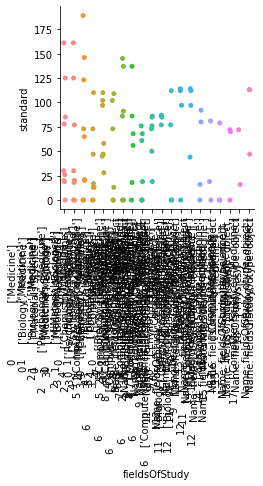

In [30]:
#sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x="fieldsOfStudy", y="standard", data=multi_author_frame)
g.set_xticklabels(rotation=90)

#plt.scatter(set(multi_author_frame["fieldsOfStudy"],multi_author_frame["standard"])
plt.show()
#sns.jointplot(data = multi_author_frame,y="fieldsOfStudy",x="standard",kind="reg")

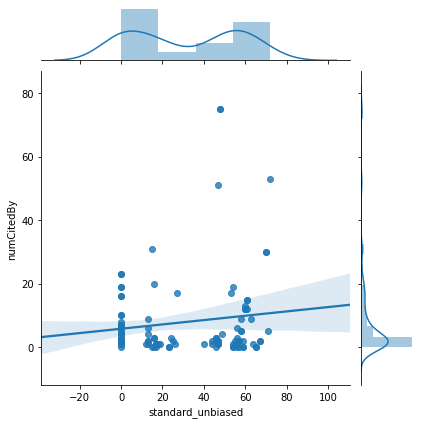

In [14]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="standard_unbiased",kind="reg")
#g.ax_joint.set_xticks(multi_author_frame["link"])


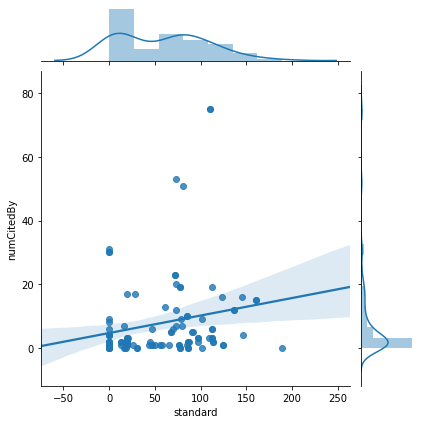

In [15]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="standard",kind="reg")

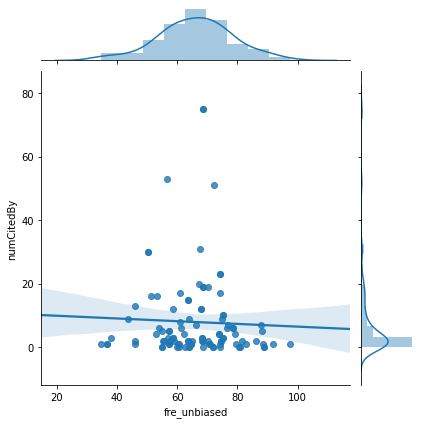

In [16]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="fre_unbiased",kind="reg")

Harder to read manuscripts where cited more often

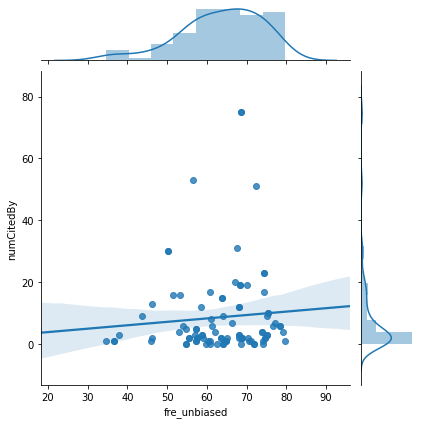

In [17]:
subset = multi_author_frame[multi_author_frame["fre_unbiased"]<=80]

sns.jointplot(data = subset,y="numCitedBy",x="fre_unbiased",kind="reg")

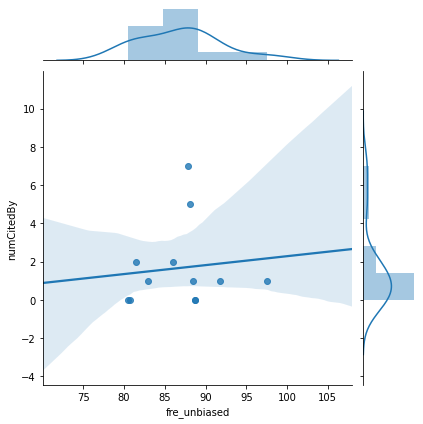

In [18]:
hard = multi_author_frame[multi_author_frame["fre_unbiased"]>=80]
sns.jointplot(data = hard,y="numCitedBy",x="fre_unbiased",kind="reg")

In [19]:
easy = multi_author_frame[multi_author_frame["fre_unbiased"]<=80]

/home/user/anaconda3/lib/python3.7/site-packages/streamlit/elements/pyplot.py:132: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "use_column_width" which is no longer supported as of 3.3 and will become an error two minor releases later



([('the', 1.0),
  ('resistance', 1.0),
  ('difficult', 0.9375),
  ('obtain', 0.875),
  ('with', 0.8125),
  ('.', 0.8125),
  ('individuals', 0.8125),
  ('system', 0.8125),
  ('of', 0.8125),
  ('for', 0.8125),
  ('physiological', 0.75),
  ('patterns', 0.75),
  ('many', 0.75),
  ('also', 0.75),
  ('self‐reported', 0.75),
  ('.', 0.75),
  ('natural', 0.75),
  ('fluctuations', 0.75),
  ('individuals', 0.75),
  ('to', 0.75),
  ('cgm', 0.75),
  (',', 0.75),
  ('of', 0.75),
  ('can', 0.6875),
  ('be', 0.6875),
  ('measure', 0.6875),
  ('a', 0.6875),
  ('multiday', 0.6875),
  ('to', 0.6875),
  ('calculate', 0.6875),
  ('management', 0.6875),
  ('cgm', 0.6875),
  ('the', 0.6875),
  ('sensitivity', 0.6875),
  ('first', 0.6875),
  ('mean', 0.6875),
  ('toward', 0.6875),
  ('sensitivity', 0.6875),
  ('factors', 0.625),
  ('that', 0.625),
  ('living', 0.625),
  ('in', 0.625),
  ('diaries', 0.625),
  ('in', 0.625),
  ('in', 0.625),
  ('the', 0.625),
  ('pancreas', 0.625),
  ('sensitivity', 0.625),
  

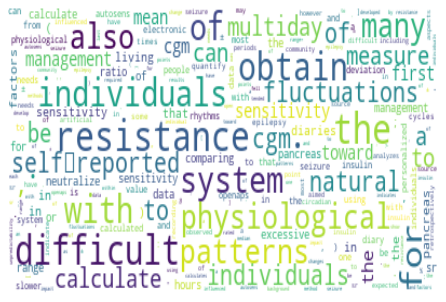

In [20]:


gs=[]
for tok in hard["hard_snippet"]:
    gs.append(tok)
gs

gs2= create_giant_strings(gs,not_want_list)
art_cloud_wl(gs2)

(<wordcloud.wordcloud.WordCloud at 0x7fd74f4c3290>,
 <Figure size 432x288 with 1 Axes>,
 <module 'matplotlib.pyplot' from '/home/user/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

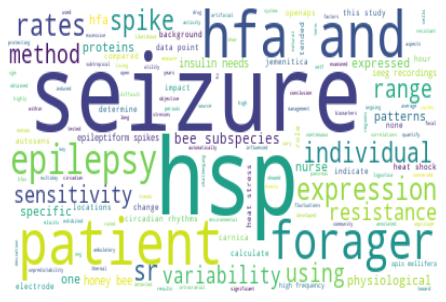

In [21]:
art_cloud(gs2)

([('ventroposteriorlateral', 1.0),
  ('electrophysiological', 0.9090909090909091),
  ('ventroposteriomedial', 0.9090909090909091),
  ('ultrasoundinduced', 0.7727272727272727),
  ('photoluminescence', 0.7727272727272727),
  ('characterization', 0.7272727272727273),
  ('unpredictability', 0.7272727272727273),
  ('postimplantation', 0.7272727272727273),
  ('retrospectively', 0.6818181818181818),
  ('revealing', 0.6818181818181818),
  ('contextualizes', 0.6363636363636364),
  ('accelerometers', 0.6363636363636364),
  ('investigations', 0.6363636363636364),
  ('environmental', 0.5909090909090909),
  ('rearrangement', 0.5909090909090909),
  ('generalizable', 0.5909090909090909),
  ('abnormalities', 0.5909090909090909),
  ('visualization', 0.5909090909090909),
  ('opportunities', 0.5909090909090909),
  ('physiological', 0.5909090909090909),
  ('walking', 0.5909090909090909),
  ('evident', 0.5909090909090909),
  ('automatically', 0.5909090909090909),
  ('parkinsonism', 0.5454545454545454),
  (

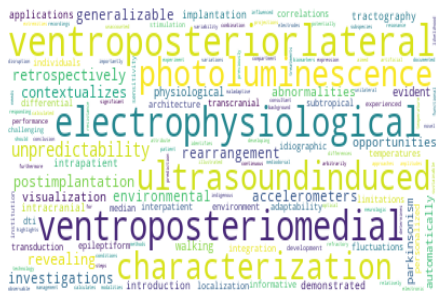

In [22]:
gs=[]
for tok in hard["tokens"]:
    gs.extend(tok)
gs

gs2= create_giant_strings(gs,not_want_list)
art_cloud_wl(gs2)
    

(<wordcloud.wordcloud.WordCloud at 0x7fd74eb42b90>,
 <Figure size 432x288 with 1 Axes>,
 <module 'matplotlib.pyplot' from '/home/user/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

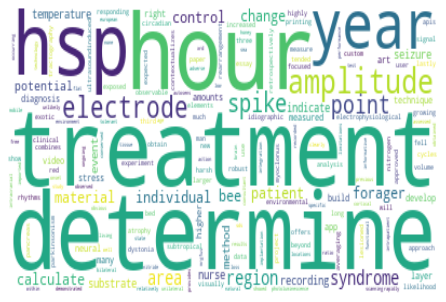

In [23]:
art_cloud(gs2)


In [24]:
subset = multi_author_frame[multi_author_frame["sp"]<=0.15]


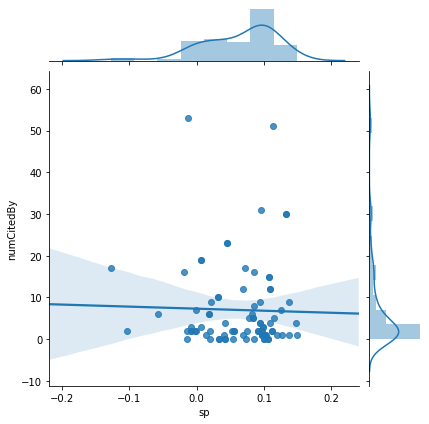

In [25]:
sns.jointplot(data = subset,y="numCitedBy",x="sp",kind="reg")

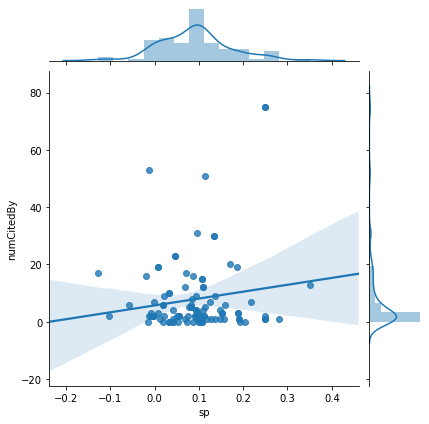

In [26]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="sp",kind="reg")

Articles with too much positive sentiment were cited less often

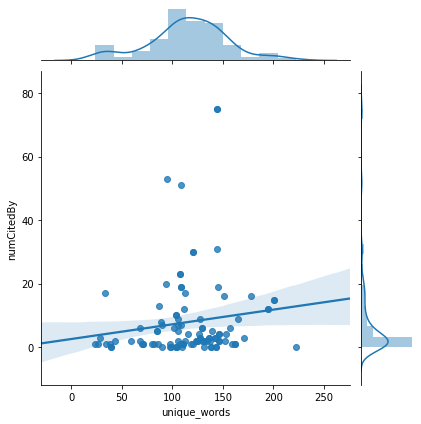

In [27]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="unique_words",kind="reg")

Articles with more unique words were cited more often

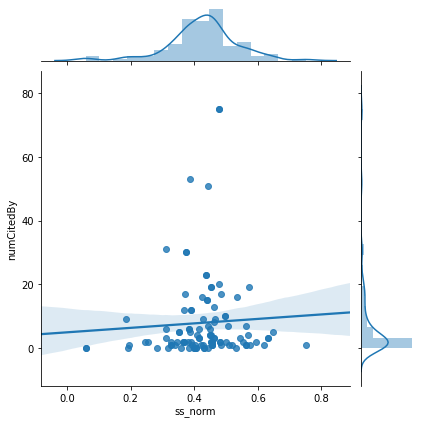

In [28]:
sns.jointplot(data = multi_author_frame,y="numCitedBy",x="ss_norm",kind="reg")

Articles with more sentiment subjectivity were cited slightly more often (not statistically significant).